In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\humme\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Let's make sure we are all set up first

In [9]:
nltk.word_tokenize("Data 620 is so fun")

['Data', '620', 'is', 'so', 'fun']

1. Choose a corpus of interest. 

Now, let's get an idea for what is in the gutenberg files

In [10]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Macbeth is my favorite Shakspeare play, so let's dig into this one. 

In [11]:
macbeth = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')

2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 

Let's get rid of punctuation and numerics as well as get rid of stopwords. Unique words will be all words with the exceptoin of those excluded. 


In [14]:
# strip punctuation and numerics using isalpha() method
macbeth = [w for w in macbeth if w.isalpha()]
# strip out stop words
macbeth = [w for w in macbeth if w not in stopwords.words('english')]

In [25]:
macbeth_unique = set(macbeth)
len_mac = len(macbeth_unique)
print(len_mac)

3894


3. Taking the most common words, how many unique words represent half of the total words in the corpus?

Let's see what we are looking at

In [23]:
freq = FreqDist(macbeth).most_common(10)
print(freq)

[('I', 333), ('And', 170), ('Macb', 137), ('The', 118), ('haue', 117), ('Enter', 80), ('That', 80), ('What', 74), ('To', 73), ('thou', 63)]


First, let's make a dataframe

In [44]:
# make a dataframe to produce relative frequencies
mac_top = pd.DataFrame(FreqDist(macbeth).most_common(len_mac),columns=['word','count'])
mac_top['rel_freq'] = mac_top['count']/len(macbeth)
mac_top.head(10)

,word,count,rel_freq
0,I,333,0.027820
1,And,170,0.014202
2,Macb,137,0.011445
3,The,118,0.009858
4,haue,117,0.009774
5,Enter,80,0.006683
6,That,80,0.006683
7,What,74,0.006182
8,To,73,0.006099
9,thou,63,0.005263


now let's cumulative sum the rel_freq and we can find where it is 50%

In [45]:
mac_top = mac_top.sort_values(by=['rel_freq'], ascending=False)
mac_top['cumulative'] = mac_top['rel_freq'].cumsum()

In [46]:
mac_top.loc[mac_top['cumulative'] < .51]

,word,count,rel_freq,cumulative
0,I,333,0.027820,0.027820
1,And,170,0.014202,0.042022
2,Macb,137,0.011445,0.053467
3,The,118,0.009858,0.063325
4,haue,117,0.009774,0.073099
...,...,...,...,...
307,woman,7,0.000585,0.507268
290,bid,7,0.000585,0.507853
291,comming,7,0.000585,0.508438
272,Donalbaine,7,0.000585,0.509023


After a little playing around, I found the 50% at Light even if it is technically a little over

In [47]:
print("There are:", len(mac_top.loc[mac_top['cumulative'] < .51]), "words that make up 50% of the play")

There are: 292 words that make up 50% of the play


4. Identify the 200 highest frequency words in this corpus.

In [77]:
mac_top200 = pd.DataFrame(FreqDist(macbeth).most_common(200),columns=['word','count'])
mac_top200['rel_freq'] = mac_top200['count']/len(macbeth)
mac_top200['log_count'] = np.log2(mac_top200['count'])
mac_top200.head(10)

,word,count,rel_freq,log_count
0,I,333,0.027820,8.379378
1,And,170,0.014202,7.409391
2,Macb,137,0.011445,7.098032
3,The,118,0.009858,6.882643
4,haue,117,0.009774,6.870365
5,Enter,80,0.006683,6.321928
6,That,80,0.006683,6.321928
7,What,74,0.006182,6.209453
8,To,73,0.006099,6.189825
9,thou,63,0.005263,5.977280


5. Create a graph that shows the relative frequency of these 200 words. 

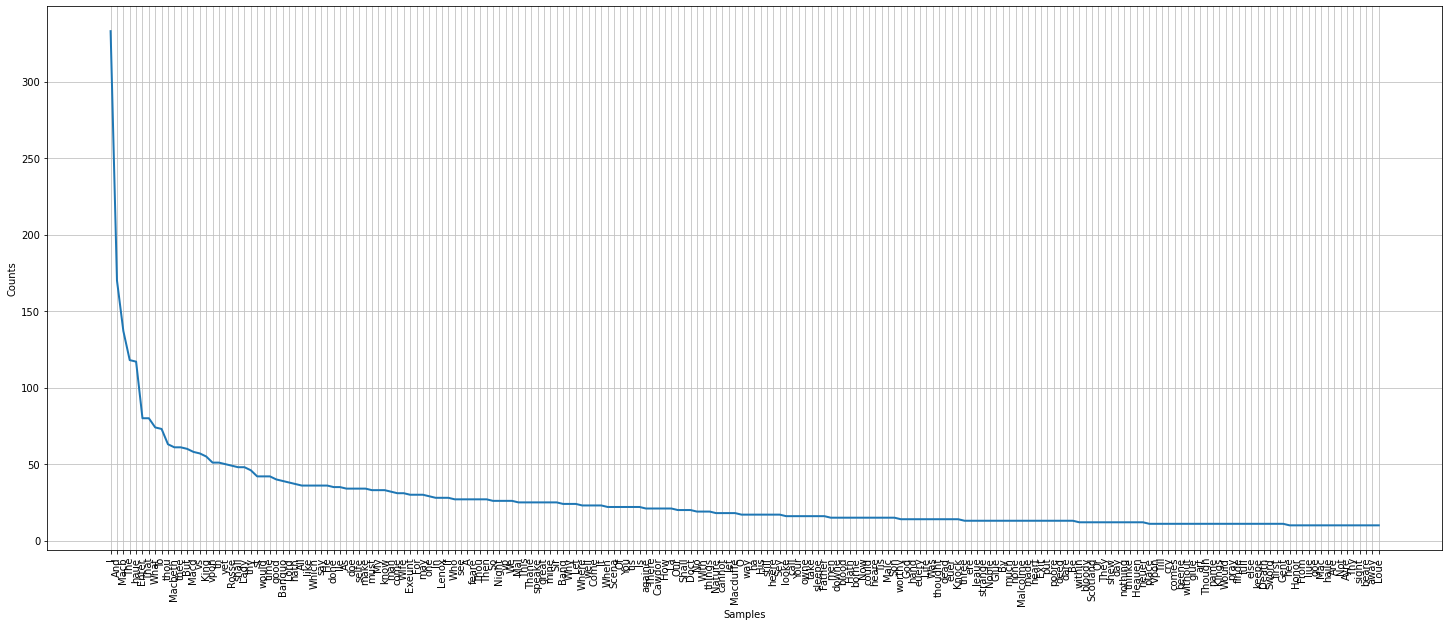

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
plt.figure(figsize=(25, 10))
plt.rc('xtick', labelsize=10) 

FreqDist(macbeth).plot(200)

6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 

Thanks to this [article](https://goodresearch.dev/zipf.html), I can use a log to see if it follows the distribution

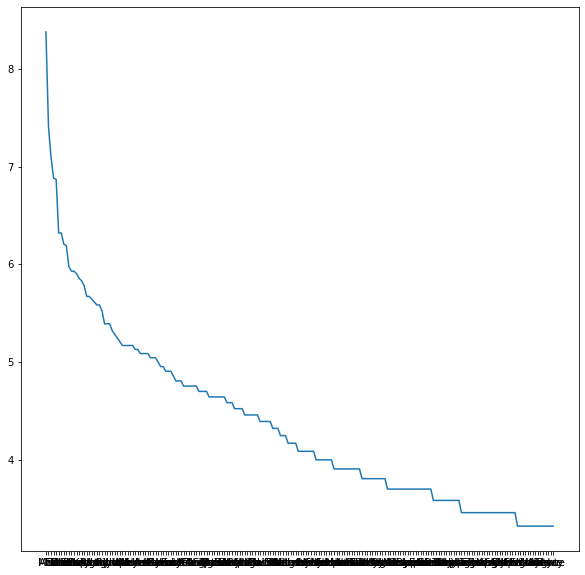

In [82]:
plt.figure(figsize=(10, 10))
plt.plot(mac_top200['word'], mac_top200['log_count'])

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

According to Zipf's Law we expect if the most common word occurs n times then the next most common word should occur $\frac{N}{2}$ times. On a log scale graph this would be a straight line. We can see Macbeth does not follow this pattern. It appears that the most commonly used words occur at a much higher frequency than the other words. 

Since this is one of the books modern English is based off of, I would say it does not do a fair job at looking at modern literaure. It is also a short play, with only 3894 words. So compared to English language as a whole as well as larger books, the sample size is not as large.